In [ ]:
from google.colab import drive
drive.mount('/content/drive')
way = "/content/drive/MyDrive/Colab_Notebooks/AAA_ML/datasets/"

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

# Пайторч

In [ ]:
import torch
import numpy as np

In [ ]:
x1 = torch.tensor([0.333, 0.5, 5.0], requires_grad=False)
x2 = torch.tensor([0.666, 0.25, 10.0], requires_grad=False)
x3 = torch.tensor([0.999, 0.1, 1.0], requires_grad=False)
x4 = torch.tensor([0.1, 0.1, 0.2], requires_grad=False)
w1 = torch.tensor([[-1.5, -0.5],
                   [0., 1.],
                   [1.5, 3.0]], requires_grad=True)

w2 = torch.tensor([[2.5, 0.5, -1.5],
                   [3.5, 1.5, 1.5]], requires_grad=True)

b1 = torch.tensor([0., 0.], requires_grad=True)
b2 = torch.tensor([0., 0., 0.], requires_grad=True)
y = torch.tensor([1, 2, 0, 1])


In [ ]:
x = torch.stack([x1, x2, x3, x4])

z1 = torch.sigmoid(torch.matmul(x, w1) + b1)
z2 = torch.matmul(z1, w2) + b2
loss_func = torch.nn.CrossEntropyLoss(reduction='mean')

loss = loss_func(z2, y)
loss.backward()
loss

tensor(3.1549, grad_fn=<NllLossBackward0>)

In [ ]:
b1.grad

tensor([0.0962, 0.0980])

In [ ]:
b1.grad[0].numpy() + loss.detach().numpy()

3.251049

In [ ]:
import numpy as np
import torch
from torch import nn


class MLPClassifier(nn.Module):
    def __init__(self, input_size, output_size=1):
        super(MLPClassifier, self).__init__()

        self.flatten = nn.Flatten()

        self.input_layer = nn.Linear(input_size, 16)
        self.input_activation = nn.ReLU()

        self.hidden_layer = nn.Linear(16, 16)
        self.hidden_activation = nn.ReLU()

        self.output = nn.Linear(16, output_size)
        self.output_activation = nn.ReLU()

    def forward(self, x):

        x = self.flatten(x)

        x = self.input_layer(x)
        x = self.input_activation(x)

        x = self.hidden_layer(x)
        x = self.hidden_activation(x)

        x = self.output(x)
        x = self.output_activation(x)

        return x

model = MLPClassifier(input_size=128, output_size=10)
input_data = torch.tensor(np.random.rand(1, 128)).float()
model(input_data)


tensor([[0.2570, 0.0000, 0.0295, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2427,
         0.0320]], grad_fn=<ReluBackward0>)

In [ ]:
b = torch.randn(2, 4)
c = torch.randn(2, 4)

c * b

tensor([[ 0.2104, -0.1892,  0.2616,  0.0293],
        [-0.2002, -0.1037,  0.1788,  0.0031]])

In [ ]:
torch.concat([c, b])

tensor([[-0.4353,  0.1938,  0.4780,  0.0631],
        [ 0.2434,  0.1266, -1.4489,  0.0058],
        [-0.4833, -0.9762,  0.5472,  0.4642],
        [-0.8224, -0.8191, -0.1234,  0.5410]])

# Нейронки

In [ ]:
import numpy as np
import torch
import torch.nn as nn


class BatchNorm1d(nn.Module):

    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super().__init__()
        shape = (1, num_features)

        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))

        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

        self.eps = eps
        self.momentum = momentum

    def forward(self, x):
        # torch.is_grad_enabled() возвращает True, если расчёт градиентов включен,
        # то есть модель находится в состоянии обучения (train)
        if not torch.is_grad_enabled():
            pass
        else:
            pass

def read_matrix(n_rows, dtype=float):
    return np.array([list(map(dtype, input().split())) for _ in range(n_rows)]).astype(float)

def print_matrix(matrix):
    for row in matrix:
        print(' '.join(map(str, row)))

def solution():
    batch_size, num_features = map(int, input().split())
    eps, momentum = map(float, input().split())
    train_vectors = read_matrix(batch_size)
    test_vectors = read_matrix(batch_size)

    train_vectors = torch.from_numpy(train_vectors).float()
    test_vectors = torch.from_numpy(test_vectors).float()

    batch_norm_1d = BatchNorm1d(num_features, eps, momentum)
    output_train = batch_norm_1d.forward(train_vectors).detach().numpy().round(2)
    with torch.no_grad():
        output_eval = batch_norm_1d.forward(test_vectors).detach().numpy().round(2)

    print_matrix(output_train)
    print()
    print_matrix(output_eval)

solution()

In [ ]:
def softmax(z):
    sum_e = np.sum(np.exp(z))
    return np.exp(z) / sum_e

def cross_entropy(y, y_hat):
    # Assuming y is a 1D array of class indices, and y_hat is a 2D array of probabilities
    # Convert y to one-hot encoding
    y_one_hot = np.zeros_like(y_hat)
    y_one_hot[np.arange(len(y)), y] = 1
    # Compute the cross-entropy loss
    loss = -np.sum(y_one_hot * np.log(y_hat)) / len(y)  # Add epsilon to prevent log(0)
    return loss

y_hat_ent = [softmax(x) for x in z2.detach().numpy()]
cross_entropy(y, y_hat_ent).mean()
y_hat_ent

[0 1 2 3]


[array([0.97939473, 0.01812642, 0.00247888], dtype=float32),
 array([0.97962546, 0.01794551, 0.00242907], dtype=float32),
 array([0.9141475 , 0.05973826, 0.02611423], dtype=float32),
 array([0.8889954 , 0.08327538, 0.02772918], dtype=float32)]

In [ ]:
import numpy as np


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    sum_e = np.sum(np.exp(z))
    return np.exp(z) / sum_e

def logloss(y, y_hat):
    ans = 0
    for (i, j) in zip(y, y_hat):
      ans += (i * np.log(j) + (1 - i) * np.log(1 - j))
    return -ans

def cross_entropy(y, y_hat):
    ans = 0
    for (i, j) in zip(y, y_hat):
      ans += i * np.log(j)
    return -ans

def solution():
    n, k = map(int, input().split())
    y = np.array([list(map(int, input().split())) for _ in range(n)])
    z = np.array([list(map(float, input().split())) for _ in range(n)])

    y_hat_log = sigmoid(z)
    y_hat_ent = [softmax(x) for x in z]

    logloss_value = logloss(y, y_hat_log)
    crossentropy_value = cross_entropy(y, y_hat_ent)

    logloss_value = str(np.round(logloss_value, 3))
    crossentropy_value = str(np.round(crossentropy_value, 3))
    print(logloss_value + ' ' + crossentropy_value)


solution()

# Логистическая регрессия

Считаем логарифмическое правдоподобие, используя логарифмическую функцию

In [ ]:
import numpy as np

def logth_func(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood(X, y, w, b):
    z = X * w + b
    z = logth_func(z)
    ans = np.sum(y * np.log(z) + (1 - y) * np.log(1 - z))
    return ans

X = np.array([1, 2, 3])
w = -1
b = 1
y = np.array([1, 0, 1])

ll = log_likelihood(X, y, w, b)
print(f"Log likelihood: {ll:.3f}")


Log likelihood: -3.133


In [ ]:
import math

def logth_func(x):
  return 1 / (1 + math.exp(-x))

def log_credibility_calc(x: list, y: list, w, b):
  ans = 0
  for x_i, y_i in zip(x, y):
    z = logth_func(w * x_i + b)
    ans += y_i * math.log(z) + (1 - y_i) * math.log(1 - z)
  return round(ans, 3)

In [ ]:
x = [1, 2, 3]
y = [1, 0, 1]
log_credibility_calc(x, y, -1, 1)

-3.133

# Задача про периоды дат

In [ ]:
df = pd.read_csv(way + 'dataset_521000_9.txt', delimiter=';')
df.sample(5)

,seller_id,quantity,date
1419,249,5,2021-06-20
9474,56,5,2021-06-28
4398,136,16,2021-06-26
4860,330,27,2021-06-15
5369,460,2,2021-06-26


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes

seller_id             int64
quantity              int64
date         datetime64[ns]
dtype: object

In [ ]:
def calc_diff(group):
  group['period'] = group["date"].diff().fillna(pd.Timedelta(days=0))
  return group

df_mag = df.sort_values(by="date").groupby("seller_id").apply(calc_diff) \
                                  .reset_index(drop = True)
df_mag.tail(10)

,seller_id,quantity,date,period
10321,496,7,2021-06-02,0 days
10322,496,20,2021-06-03,1 days
10323,496,16,2021-06-04,1 days
10324,497,20,2021-06-27,0 days
10325,497,16,2021-06-28,1 days
10326,498,19,2021-06-27,0 days
10327,498,20,2021-06-28,1 days
10328,499,14,2021-06-27,0 days
10329,499,29,2021-06-28,1 days
10330,500,12,2021-06-28,0 days


In [ ]:
df_mag["period"] = (df_mag["period"] != pd.Timedelta(days=1))

In [ ]:
df_mag["con_period"] = df_mag["period"].cumsum()
df_mag.tail(10)

,seller_id,quantity,date,period,con_period
10321,496,7,2021-06-02,True,2112
10322,496,20,2021-06-03,False,2112
10323,496,16,2021-06-04,False,2112
10324,497,20,2021-06-27,True,2113
10325,497,16,2021-06-28,False,2113
10326,498,19,2021-06-27,True,2114
10327,498,20,2021-06-28,False,2114
10328,499,14,2021-06-27,True,2115
10329,499,29,2021-06-28,False,2115
10330,500,12,2021-06-28,True,2116


In [ ]:
df_mag.groupby("con_period").agg({"seller_id":"count", "quantity":"mean"}).mean()

seller_id     4.882325
quantity     19.911409
dtype: float64

In [ ]:
df_mag.groupby("seller_id")["con_period"].nunique().mean().round(3)

4.224

# Недвига в Новосибе

In [ ]:
df = pd.read_csv(way +'real_estate_novosibirsk.csv')
df.head()

,area,area_raw,item_id,type_of_house,floor,floors_in_house,rooms_number,price,district,price_order_id
0,91.0,91.0,198518500076,Кирпичный,3.0,16.0,3,5100000.0,Кировский,1
1,91.0,91.0,198518500076,Кирпичный,3.0,16.0,3,5100000.0,Кировский,2
2,91.0,91.0,198518500076,Кирпичный,3.0,16.0,3,5100000.0,Кировский,3
3,18.7,18.7,257626750244,Кирпичный,4.0,5.0,Студия,1300000.0,Ленинский,1
4,NaN,NaN,367907500565,Кирпичный,4.0,4.0,4,3500000.0,Кировский,1


In [ ]:
df_test = pd.read_csv(way + 'dataset_521000_13.txt', delimiter=';')
df_test.head(5)

,area,area_raw,item_id,type_of_house,floor,floors_in_house,rooms_number,district
0,42.3,42.3,713279000349,Кирпичный,5.0,5.0,2,Калининский
1,46.0,46.0,786153250361,Монолитный,4.0,24.0,1,Центральный
2,19.0,19.0,732194250143,Кирпичный,2.0,5.0,1,Заельцовский
3,63.0,63.0,794993751535,Панельный,6.0,10.0,3,Калининский
4,38.0,38.0,807453001268,Кирпичный,17.0,19.0,2,Калининский


In [ ]:
df[['floor', 'price']].corr(method='spearman')

,floor,price
floor,1.000000,0.146493
price,0.146493,1.000000


In [ ]:
df = df.drop_duplicates(subset=['item_id'], keep='last')
df = df.dropna(subset=['area'])
df.shape

(39366, 10)

In [ ]:
def process_rooms_number(x):
    if pd.isna(x):
        return 1

    if isinstance(x, int):
        return x

    if x.isdigit():
        return int(x)

    if x == 'Студия':
        return 1

    if x == 'Своб. планировка':
        return 1

    if x == '> 9':
        return 10

    return 1

df['rooms_number'] = df['rooms_number'].apply(process_rooms_number).copy()
df[['rooms_number']].head()

,rooms_number
2,3
3,1
6,4
9,1
15,2


In [ ]:
df_districts = df.groupby('district').agg({'price': [np.median, np.min, np.max], 'area': [np.median]}).round()
df_districts

price                           area
                    median      amin          amax median
district                                                 
Дзержинский      3100000.0    2250.0  1.316000e+07   45.0
Железнодорожный  4050000.0  650000.0  4.300000e+07   54.0
Заельцовский     3650000.0  580000.0  4.000000e+07   48.0
Калининский      2800000.0  550000.0  1.790000e+07   44.0
Кировский        2150000.0  130000.0  1.250000e+09   41.0
Ленинский        2750000.0     280.0  2.140000e+07   43.0
Октябрьский      3300000.0  150000.0  7.200000e+07   48.0
Первомайский     1800000.0  400000.0  9.300000e+06   31.0
Советский        3220000.0  400000.0  6.400000e+07   52.0
Центральный      4550000.0  181000.0  6.100000e+07   56.0

In [ ]:
df_fixed = df.copy()

df_fixed.loc[df['price'] < 200000, 'price'] = 400000

In [ ]:
df_fixed.groupby('district').agg({'price': [np.median, np.min, np.max], 'area': [np.median]}).round()

price                           area
                    median      amin          amax median
district                                                 
Дзержинский      3100000.0  400000.0  1.316000e+07   45.0
Железнодорожный  4050000.0  650000.0  4.300000e+07   54.0
Заельцовский     3650000.0  580000.0  4.000000e+07   48.0
Калининский      2800000.0  550000.0  1.790000e+07   44.0
Кировский        2150000.0  250000.0  1.250000e+09   41.0
Ленинский        2750000.0  350000.0  2.140000e+07   43.0
Октябрьский      3300000.0  350000.0  7.200000e+07   48.0
Первомайский     1800000.0  400000.0  9.300000e+06   31.0
Советский        3220000.0  400000.0  6.400000e+07   52.0
Центральный      4550000.0  350000.0  6.100000e+07   56.0

In [ ]:
df_districts["meter_price"] = df_districts.apply(lambda x: x[("price", "median")] / x[("area", "median")], axis = 1)
df_districts

price                           area   meter_price
                    median      amin          amax median              
district                                                               
Дзержинский      3100000.0    2250.0  1.316000e+07   45.0  68888.888889
Железнодорожный  4050000.0  650000.0  4.300000e+07   54.0  75000.000000
Заельцовский     3650000.0  580000.0  4.000000e+07   48.0  76041.666667
Калининский      2800000.0  550000.0  1.790000e+07   44.0  63636.363636
Кировский        2150000.0  130000.0  1.250000e+09   41.0  52439.024390
Ленинский        2750000.0     280.0  2.140000e+07   43.0  63953.488372
Октябрьский      3300000.0  150000.0  7.200000e+07   48.0  68750.000000
Первомайский     1800000.0  400000.0  9.300000e+06   31.0  58064.516129
Советский        3220000.0  400000.0  6.400000e+07   52.0  61923.076923
Центральный      4550000.0  181000.0  6.100000e+07   56.0  81250.000000

In [ ]:
prediction = df_test.apply(lambda x: x["area"] * df_districts.loc[x["district"], "meter_price"], axis = 1).round()

In [ ]:
prediction.to_csv('solution.csv', header=False, index=False)

# Рвзные базовые штуки

Тут считаем метрику Cost-Benefit matrix

In [ ]:
import numpy as np

a = np.zeros(400)

a[1] = 1
a[2] = 1
a[4] = 1

for i in range(0, 9):
  a[2**i] = 1
for i in range(327):
  if a[i] == 1:
    continue
  for j in range(0, 9):
    if i + 2**j <= 327:
      a[i + 2**j] = 1
print(a[:328])

[0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


In [ ]:
import numpy as np

a = np.array([1, 0, 1, 0, 1, 1])
b = np.array([1, 0, 0, 1, 0, 1])
(a == b) & (a == 1)

array([ True, False, False, False, False,  True])

In [ ]:
import numpy as np

def confusion_matrix(targets, preds):
    tp = np.sum((targets == preds) & (targets == 1)) # количество true positive
    tn = np.sum((targets == preds) & (targets == 0)) # количество true negative
    fp = np.sum((targets != preds) & (targets == 0)) # количество false positive
    fn = np.sum((targets != preds) & (targets == 1)) # количество false negative
    return tp, tn, fp, fn

def tern_iter(targets, batch_size, t, ltv, c):

  n = len(targets)
  preds = batch_size > t
  preds = preds.astype(int)

  tp, tn, fp, fn = confusion_matrix(targets, preds)

  ans = tp / n * c + fp / n * c + fn / n * ltv

  return -ans


def get_max_expected_value(targets, batch_size, ltv, c):
    #подберите оптимальное значение порога и найдите максимальное значение метрик
    min = tern_iter(targets, batch_size, 1.0, ltv, c)
    for i in range(1, 10000):
      x = tern_iter(targets, batch_size, i / 10000, ltv, c)
      if x > min:
        min = x
    if min == -0.0:
      return -min
    return min

def read_vector(dtype=float):
    return np.array(list(map(dtype, input().split())))

def solution():
    ltv, c = map(int, input().split())
    targets = read_vector()
    predictions = read_vector()

    max_expected_value = get_max_expected_value(targets, predictions, ltv, c).round(3)
    print(max_expected_value)

solution()

50000 5000
0 0 0 0 0 0
0.4 0.9 0.1 0.5 0.7 0.15
0.0


50000 5000

0 0 0 0 0 0

0.4 0.9 0.1 0.5 0.7 0.15

In [ ]:
import scipy
value = np.prod(scipy.stats.poisson(mu = 2).pmf([1,4,1,2,1]))
print(np.log(value))

-7.632876385868383


In [ ]:

def solution():
    n, m, k = map(int, input().split())
    lines = [input().split() for line in range(m)]

    M = np.array([list(map(int, row)) for row in lines])

    max_sum = 0

    for i, x in enumerate(M):
      for j, y in enumerate(x):

        max_sum = max(max_sum, np.sum(M[i:i+n , j:j+n]))
        if (j + n > m):
          break
      if (i + n > k):
          break

    print(str(int(max_sum)))

solution()

2 3 3
1 0 0
0 0 0
0 0 2
2


In [ ]:
import numpy as np

def solution():
    v = np.array(list(map(float, input().split())))
    n, t = input().split()
    n, t = int(n), float(t)

    us = np.array([input().split() for u in range(n)]).astype(float)

    indicies = []

    for i, x in enumerate(us):
      evc = np.linalg.norm(x - v)

      if evc <= t:
        indicies.append(i)

    print(' '.join(map(str, indicies)))

solution()

0
0


ValueError: ignored

1 1 1 1
4 1.0
0 0 0 0
1 0 1 0
1 1 1 1
1 1 1 0

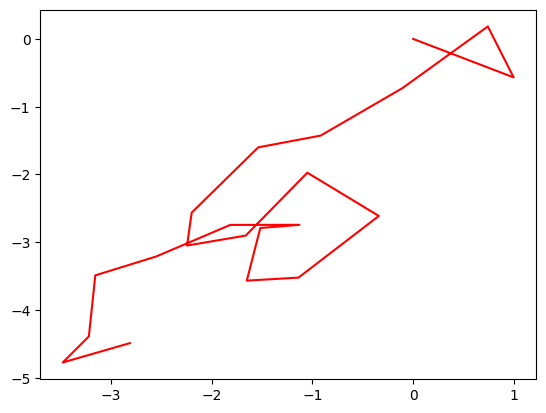

In [ ]:
import time
import matplotlib.pyplot as plt

from IPython.display import clear_output

x_grid = np.linspace(-6, 6) # создаем набор значений от -6 до 6 для x
y_grid = np.linspace(-6, 6) # создаем набор значений от -6 до 6 для y

X, Y = np.meshgrid(x_grid, y_grid) # превращаем наборы значений в матрицы
Z = X**2 + Y**2 - X*Y # вычисляем функцию по оси Z

x_0, y_0 = 0, 0 # создаем стартовое значение для случайных блужданий

xs = [x_0] # координаты точек блужданий по x (пока только с одним значением)
ys = [y_0] # координаты точек блужданий по y(пока только с одним значением)
n_steps = 20 # количество случайных шагов

for i in range(n_steps):

    x = xs[-1] + np.random.uniform(low=-1, high=1) # вычисляем новую координату по х
                                                   # сложением предыдущей и случайного числа от -1 до 1
    y = ys[-1] + np.random.uniform(low=-1, high=1)

    xs.append(x) # добавляем координату по x
    ys.append(y) # добавляем координату по y

    clear_output(True) # очищаем output
    fig, ax = plt.subplots() # создаем картинку
    cs = ax.contourf(X, Y, Z) # рисуем контур функции
    ax.plot(xs, ys, 'r') # рисуем блуждание
    plt.show()

    time.sleep(0.1) # устанавливаем задержку по времени, чтобы наблюдать блуждание

<ipython-input-32-0a4c9c018c9b>:4: RuntimeWarning: divide by zero encountered in log
  log_func = lambda x: np.log(x)


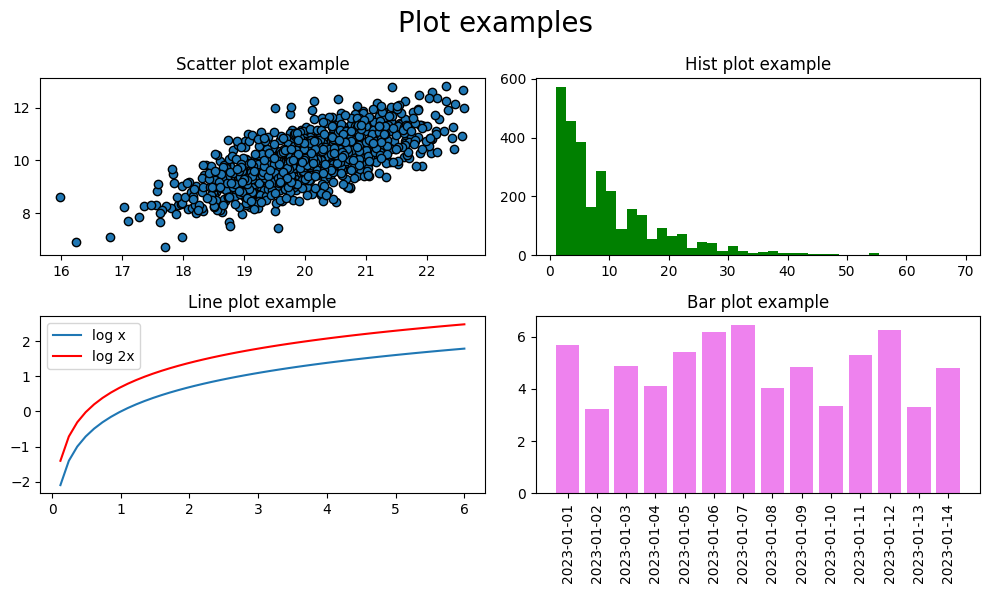

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

log_func = lambda x: np.log(x)

fig, ax = plt.subplots(2, 2)

fig.set_figheight(6)
fig.set_figwidth(10)
fig.suptitle("Plot examples", fontsize = 20)

#Точечный
mean = [20, 10]
cov = [[1, 0.7], [0.7, 1]]
sample_size = 1000
scatter_samples = np.random.multivariate_normal(mean, cov, sample_size)

ax[0][0].scatter(scatter_samples[:, 0], scatter_samples[:, 1],
                 edgecolor = "black")
ax[0][0].set_title("Scatter plot example")

#Гистограмма
x2 = np.random.geometric(p=0.1, size=3000)

ax[0][1].hist(x2, bins=40, color = "green")
ax[0][1].set_title("Hist plot example")

#Линейный
x3 = np.linspace(0, 6)
y3_1 = log_func(x3)
y3_2 = log_func(x3 * 2)

ax[1][0].plot(x3, y3_1, label='log x')
ax[1][0].plot(x3, y3_2, label='log 2x', color = 'red')
ax[1][0].legend()
ax[1][0].set_title("Line plot example")

#Столбчатый
bar_samples = np.random.normal(5, size = 14)
start_date = np.datetime64('2023-01-01')
dates = start_date + np.arange(14)

ax[1][1].bar(dates, bar_samples, color = "violet")
ax[1][1].set_xticks(dates)
ax[1][1].set_xticklabels(dates, rotation=90)
ax[1][1].set_title("Bar plot example")

fig.set_tight_layout(True)